In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))
print("Shape of an individual sample:", x_train[0].shape)

Number of training samples: 60000
Number of testing samples: 10000
Shape of an individual sample: (28, 28)


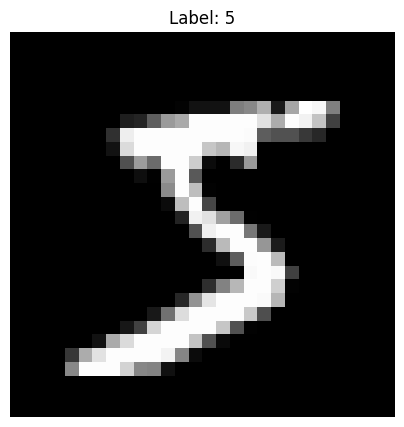

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train_flattened = x_train.reshape(len(x_train), -1)
x_test_flattened = x_test.reshape(len(x_test), -1)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4735 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9259


In [10]:
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")
model.fit(x_train_flattened, y_train, epochs=5)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9257
Test loss: 0.2669, Test accuracy: 0.9257
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2581 - accuracy: 0.9276
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2553 - accuracy: 0.9299
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2530 - accuracy: 0.9298
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2511 - accuracy: 0.9310


In [11]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 3ms/step


In [12]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


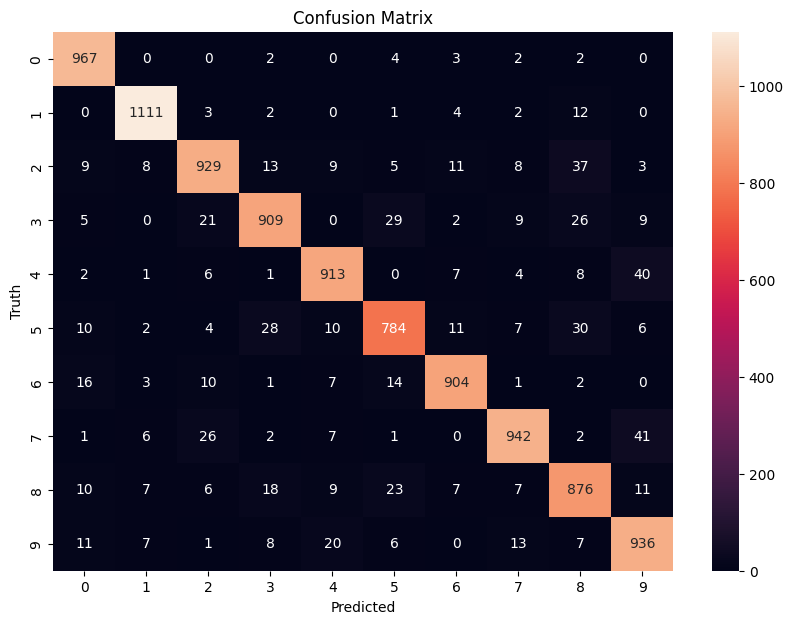

In [13]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [14]:
model_with_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_with_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Train the Model with Hidden Layer
model_with_hidden.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2783 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1306 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0899 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0686 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0531 - accuracy: 0.9833


In [15]:
hidden_test_loss, hidden_test_accuracy = model_with_hidden.evaluate(x_test_flattened, y_test)
print(f"Test accuracy with hidden layer: {hidden_test_accuracy:.4f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0792 - accuracy: 0.9755
Test accuracy with hidden layer: 0.9755


In [16]:
sample_indices = np.random.randint(0, len(x_test), size=5)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Flatten the sample images
sample_images_flattened = sample_images.reshape(len(sample_images), -1)

sample_predictions = model_with_hidden.predict(sample_images_flattened)
predicted_classes = np.argmax(sample_predictions, axis=1)

1/1 [==============================] - 0s 58ms/step


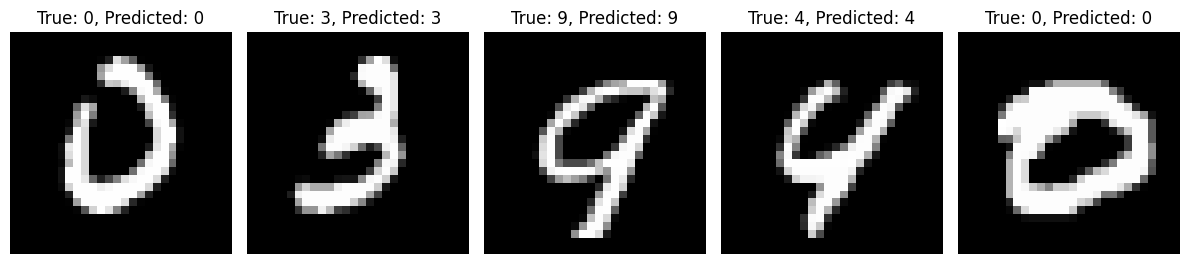

In [17]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

TASK 2 TITANIC

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
# Load the train datasets
trn_df = pd.read_csv('/content/taks_2 Train.csv')

In [22]:
trn_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [23]:
trn_df.shape

(891, 12)

In [24]:
trn_df.size

10692

In [25]:
#check for non -null value in datset
trn_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [26]:
# Check for missing values
missing_values = trn_df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

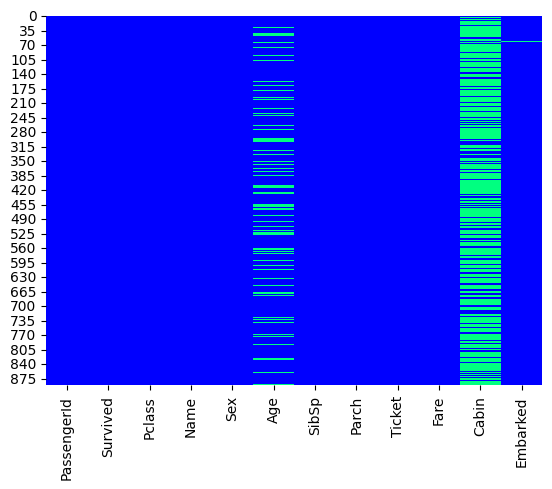

In [27]:
#visualize the missing data
sns.heatmap(trn_df.isnull(), cmap='winter', cbar=False)
plt.show()

In [28]:
numerical_columns = trn_df.select_dtypes(include=['int64', 'float64']).columns
trn_df[numerical_columns] = trn_df[numerical_columns].fillna(trn_df[numerical_columns].mean())

In [29]:
categorical_columns = trn_df.select_dtypes(include='object').columns
trn_df[categorical_columns] = trn_df[categorical_columns].fillna('Unknown')

In [30]:
# Chcek if any missing value is left after handling
print(trn_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [31]:
trn_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

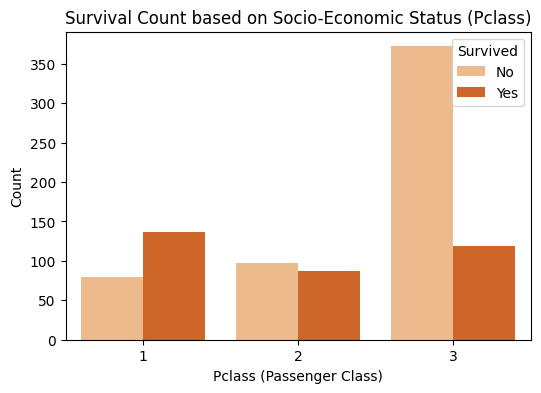

In [32]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=trn_df, palette='Oranges')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

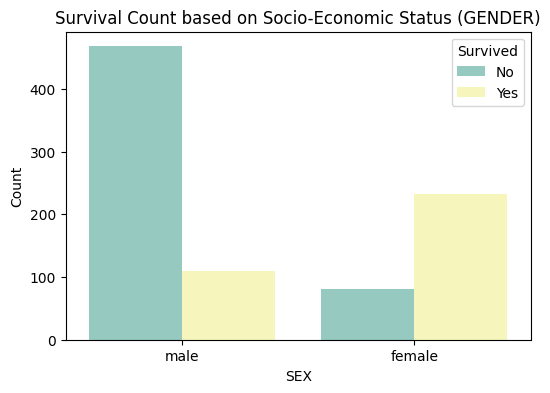

In [33]:
# Visualizing survival based on socio-economic status (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=trn_df, palette='Set3')
plt.title('Survival Count based on Socio-Economic Status (GENDER)')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

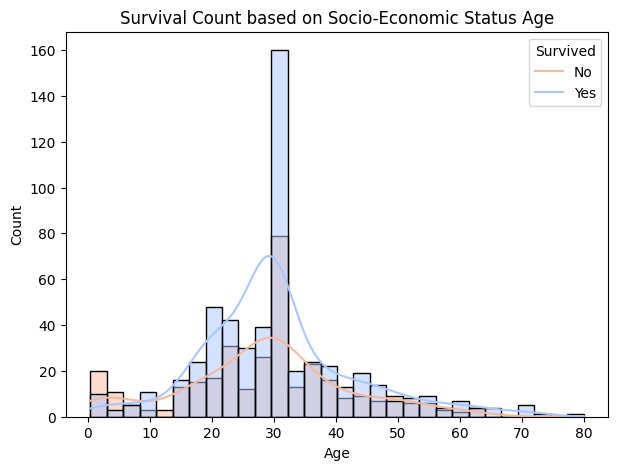

In [34]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', data=trn_df, kde=True, palette='coolwarm')
plt.title('Survival Count based on Socio-Economic Status Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

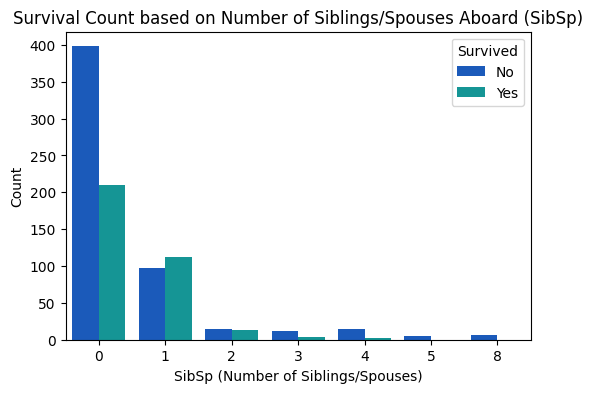

In [35]:
# Visualizing survival based on socio-economic status (siblings/spouses aboard (SibSp))
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=trn_df, palette='winter')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

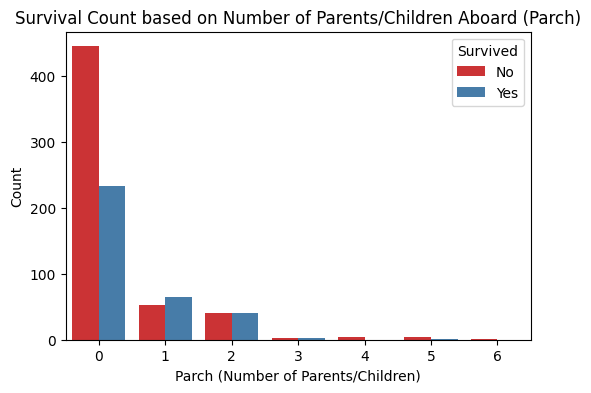

In [36]:
# Visualizing survival based on socio-economic status (number of parents/children aboard (Parch))
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=trn_df, palette='Set1')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [37]:
trn_df. head().T

0  \
PassengerId                        1   
Survived                           0   
Pclass                             3   
Name         Braund, Mr. Owen Harris   
Sex                             male   
Age                             22.0   
SibSp                              1   
Parch                              0   
Ticket                     A/5 21171   
Fare                            7.25   
Cabin                        Unknown   
Embarked                           S   

                                                             1  \
PassengerId                                                  2   
Survived                                                     1   
Pclass                                                       1   
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...   
Sex                                                     female   
Age                                                       38.0   
SibSp                                                        1   
Parch                                                        0   
Ticket                                                PC 17599   
Fare                                                   71.2833   
Cabin                                                      C85   
Embarked                                                     C   

                                  2  \
PassengerId                       3   
Survived                          1   
Pclass                            3   
Name         Heikkinen, Miss. Laina   
Sex                          female   
Age                            26.0   
SibSp                             0   
Parch                             0   
Ticket             STON/O2. 3101282   
Fare                          7.925   
Cabin                       Unknown   
Embarked                          S   

                                                        3  \
PassengerId                                             4   
Survived                                                1   
Pclass                                                  1   
Name         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Sex                                                female   
Age                                                  35.0   
SibSp                                                   1   
Parch                                                   0   
Ticket                                             113803   
Fare                                                 53.1   
Cabin                                                C123   
Embarked                                                S   

                                    4  
PassengerId                         5  
Survived                            0  
Pclass                              3  
Name         Allen, Mr. William Henry  
Sex                              male  
Age                              35.0  
SibSp                               0  
Parch                               0  
Ticket                         373450  
Fare                             8.05  
Cabin                         Unknown  
Embarked                            S

In [38]:
# Drop columns that are not likely to be useful for prediction
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

trn_df1 = trn_df.drop(columns=columns_to_drop)

In [39]:
trn_df1

Survived  Pclass     Sex        Age  SibSp  Parch
0           0       3    male  22.000000      1      0
1           1       1  female  38.000000      1      0
2           1       3  female  26.000000      0      0
3           1       1  female  35.000000      1      0
4           0       3    male  35.000000      0      0
..        ...     ...     ...        ...    ...    ...
886         0       2    male  27.000000      0      0
887         1       1  female  19.000000      0      0
888         0       3  female  29.699118      1      2
889         1       1    male  26.000000      0      0
890         0       3    male  32.000000      0      0

[891 rows x 6 columns]

In [40]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
trn_df1['Sex'] = label_encoder.fit_transform(trn_df1['Sex'])

In [41]:
# Separate features and target variable
X = trn_df1.drop('Survived', axis=1)
y = trn_df1['Survived']

In [42]:
# Split the training data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
#Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [44]:
#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7597765363128491


In [45]:
test_df = pd.read_csv('/content/taks_2 Test.csv')

In [46]:
test_df.head(2).T

0                                 1
PassengerId               892                               893
Pclass                      3                                 3
Name         Kelly, Mr. James  Wilkes, Mrs. James (Ellen Needs)
Sex                      male                            female
Age                      34.5                              47.0
SibSp                       0                                 1
Parch                       0                                 0
Ticket                 330911                            363272
Fare                   7.8292                               7.0
Cabin                     NaN                               NaN
Embarked                    Q                                 S

In [47]:
# Drop columns that are not likely to be useful for prediction
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']

test_df1 = test_df.drop(columns=columns_to_drop)

In [48]:
test_df1

Pclass     Sex   Age  SibSp  Parch
0         3    male  34.5      0      0
1         3  female  47.0      1      0
2         2    male  62.0      0      0
3         3    male  27.0      0      0
4         3  female  22.0      1      1
..      ...     ...   ...    ...    ...
413       3    male   NaN      0      0
414       1  female  39.0      0      0
415       3    male  38.5      0      0
416       3    male   NaN      0      0
417       3    male   NaN      1      1

[418 rows x 5 columns]

In [57]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
test_df1['Sex'] = label_encoder.fit_transform(test_df1['Sex'])

In [50]:
test_df1.count()

Pclass    418
Sex       418
Age       332
SibSp     418
Parch     418
dtype: int64

In [51]:
# Check for missing values
missing_values = test_df1.isnull().sum()
missing_values

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64

In [52]:
#Handle missing value
test_df1['Age'] = test_df1['Age'].fillna(test_df1['Age'].mean())

In [53]:
# Predict on the test Dataset
predictions = model.predict(test_df1)

In [54]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('/content/taks_2 Test.csv')['PassengerId'],'Survived': predictions})
prediction_data.to_csv('tit_prediction_df.csv', index=False)

In [55]:
# Load the tit_prediction_df datasets
predict_df = pd.read_csv('tit_prediction_df.csv')

In [56]:
predict_df.head(419)

PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [58]:
# Split the training data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Create the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

In [60]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predict on the train dataset and check for accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8268156424581006


In [62]:
# Predict on the test set
predict_random= model.predict(test_df1)

In [64]:
prediction_data=pd.DataFrame({'PassengerId': pd.read_csv('/content/taks_2 Test.csv')['PassengerId'],'Survived': predict_random})
prediction_data.to_csv('tit_prediction_df.csv', index=False)

In [65]:
# Load the tit_prediction_df datasets
predict_random_df = pd.read_csv('tit_prediction_df.csv')

In [66]:
predict_random_df. head(419)

PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

TASK 1

In [67]:
#importing libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [68]:
# data_importing
df = pd.read_csv("NFLX.csv")
# fetching first 10 rows of dataset
df.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
5  2018-02-12  252.139999  259.149994  249.000000  257.950012  257.950012   
6  2018-02-13  257.290009  261.410004  254.699997  258.269989  258.269989   
7  2018-02-14  260.470001  269.880005  260.329987  266.000000  266.000000   
8  2018-02-15  270.029999  280.500000  267.630005  280.269989  280.269989   
9  2018-02-16  278.730011  281.959991  275.690002  278.519989  278.519989   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
5   8534900  
6   6855200  
7  10972000  
8  10759700  
9   8312400

In [69]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
1004  20047500  
1005  22542300  
1006  14346000  
1007   9905200  
1008   7782400

In [70]:
df.shape

(1009, 7)

In [71]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [73]:
# check for non-null values
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [74]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [75]:
#Check for required columns
df = df[['Date','Open','Close']]

# converting object dtype of date column to datetime dtype

df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))

In [76]:
df.set_index('Date',drop=True,inplace=True)
df.head(10)

Open       Close
Date                              
2018-02-05  262.000000  254.259995
2018-02-06  247.699997  265.720001
2018-02-07  266.579987  264.559998
2018-02-08  267.079987  250.100006
2018-02-09  253.850006  249.470001
2018-02-12  252.139999  257.950012
2018-02-13  257.290009  258.269989
2018-02-14  260.470001  266.000000
2018-02-15  270.029999  280.269989
2018-02-16  278.730011  278.519989

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

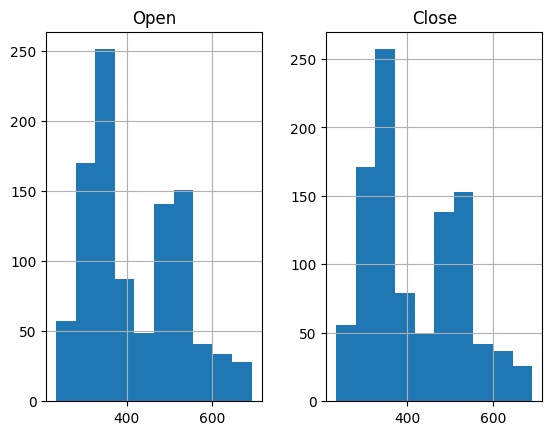

In [77]:
df.hist()

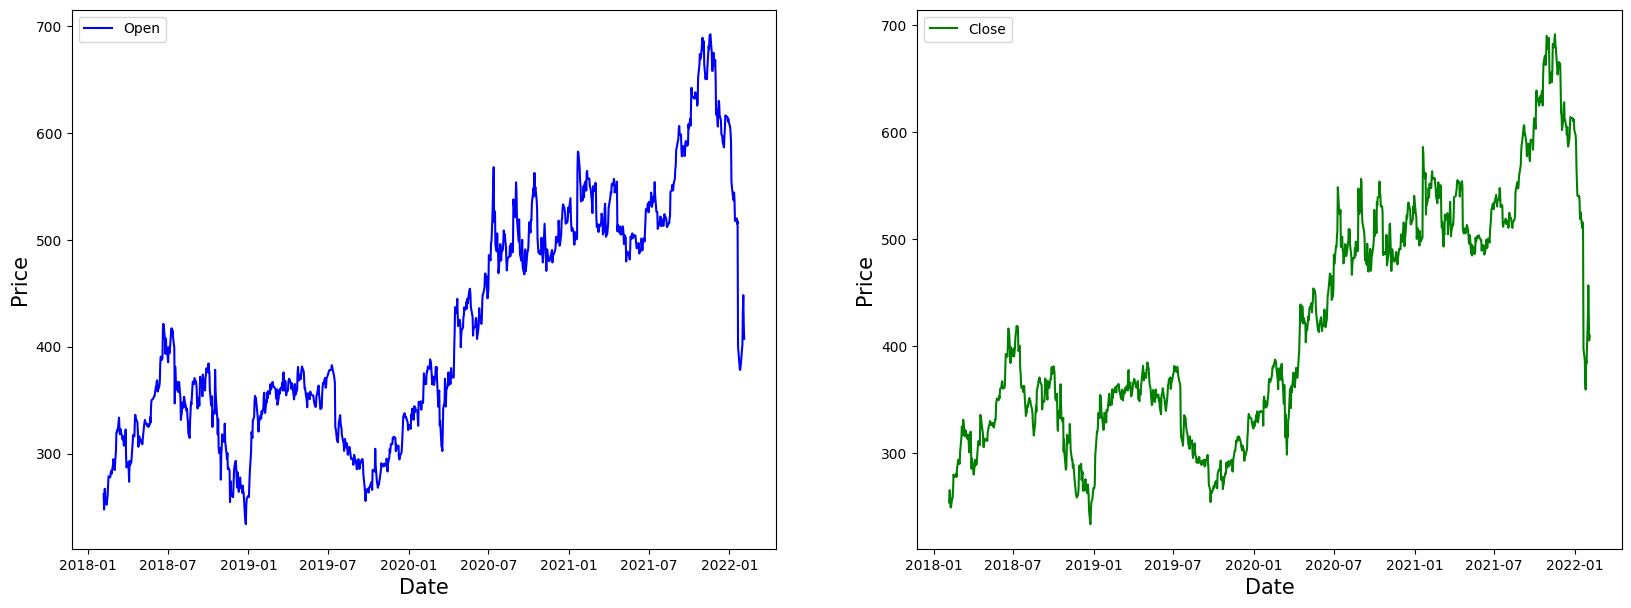

In [78]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [79]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

Open     Close
Date                          
2018-02-05  0.061253  0.044516
2018-02-06  0.030059  0.069548
2018-02-07  0.071243  0.067015
2018-02-08  0.072334  0.035430
2018-02-09  0.043474  0.034053
2018-02-12  0.039744  0.052576
2018-02-13  0.050978  0.053275
2018-02-14  0.057915  0.070160
2018-02-15  0.078769  0.101330
2018-02-16  0.097747  0.097508

In [80]:

df.tail(10)


Open     Close
Date                          
2022-01-24  0.327182  0.334790
2022-01-25  0.316777  0.289509
2022-01-26  0.314879  0.274830
2022-01-27  0.323146  0.333807
2022-01-28  0.333399  0.328695
2022-01-31  0.366577  0.422140
2022-02-01  0.434178  0.487648
2022-02-02  0.467531  0.427251
2022-02-03  0.409048  0.375090
2022-02-04  0.378226  0.385072

In [81]:

# splitting the data into train and test set
# Select 75 % for train and 25 % for test
training_size = round(len(df) * 0.75)

In [82]:
training_size

757

In [83]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((757, 2), (252, 2))

In [84]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [85]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 2), (707, 2), (202, 50, 2), (202, 2))

In [86]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense_3 (Dense)             (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
23/23 [==============================] - 10s 100ms/step - loss: 0.0347 - mean_absolute_error: 0.1381 - val_loss: 0.0324 - val_mean_absolute_error: 0.1451
Epoch 2/100
23/23 [==============================] - 1s 51ms/step - loss: 0.0044 - mean_absolute_error: 0.0518 - val_loss: 0.0087 - val_mean_absolute_error: 0.0680
Epoch 3/100
23/23 [==============================] - 1s 49ms/step - loss: 0.0029 - mean_absolute_error: 0.0422 - val_loss: 0.0084 - val_mean_absolute_error: 0.0693
Epoch 4/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0027 - mean_absolute_error: 0.0405 - val_loss: 0.0080 - val_mean_absolute_error: 0.0613
Epoch 5/100
23/23 [==============================] - 2s 80ms/step - loss: 0.0025 - mean_absolute_error: 0.0389 - val_loss: 0.0073 - val_mean_absolute_error: 0.0585
Epoch 6/100
23/23 [==============================] - 1s 53ms/step - loss: 0.0026 - mean_absolute_error: 0.0395 - val_loss: 0.0067 - val_mean_absolute_error: 0.0576
Epoch 7/100
23

In [88]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 1s 11ms/step


array([[0.67519844, 0.6661626 ],
       [0.627921  , 0.61841846],
       [0.5997919 , 0.59073263],
       [0.58683205, 0.5792479 ],
       [0.5896321 , 0.58364445]], dtype=float32)

In [89]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[543.45123, 538.8559 ],
       [521.77783, 516.99817],
       [508.8826 , 504.3233 ],
       [502.9414 , 499.06546],
       [504.225  , 501.07825]], dtype=float32)

In [90]:
# Merging actual and predicted data for better visualization
df1 = pd.concat([df.iloc[-202:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-202:].index)], axis=1)


In [91]:
# Inversing normalization/scaling
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

Open       Close  open_predicted  close_predicted
Date                                                               
2021-04-21  508.000000  508.899994      543.451233       538.855896
2021-04-22  513.820007  508.779999      521.777832       516.998169
2021-04-23  509.010010  505.549988      508.882599       504.323303
2021-04-26  506.760010  510.299988      502.941406       499.065460
2021-04-27  512.619995  505.549988      504.225006       501.078247

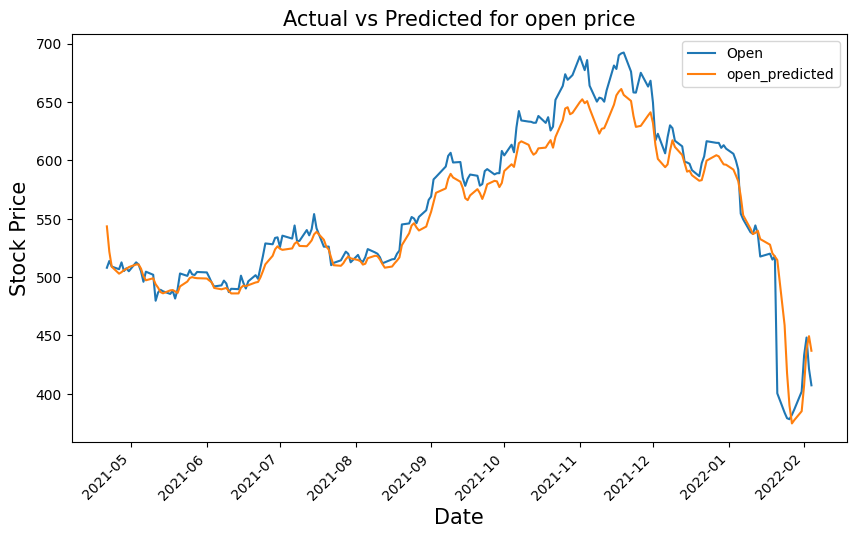

In [92]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

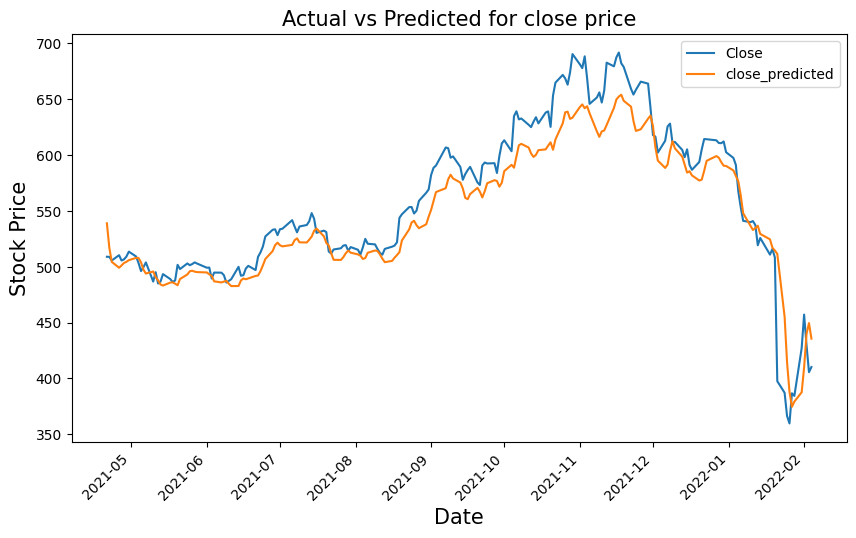

In [93]:
# plotting the actual close and predicted close prices on date index
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [94]:
df1

Open       Close  open_predicted  close_predicted
Date                                                               
2021-04-21  508.000000  508.899994      543.451233       538.855896
2021-04-22  513.820007  508.779999      521.777832       516.998169
2021-04-23  509.010010  505.549988      508.882599       504.323303
2021-04-26  506.760010  510.299988      502.941406       499.065460
2021-04-27  512.619995  505.549988      504.225006       501.078247
...                ...         ...             ...              ...
2022-01-31  401.970001  427.140015      385.109924       387.574585
2022-02-01  432.959991  457.130005      407.283142       409.776367
2022-02-02  448.250000  429.480011      438.452972       440.034424
2022-02-03  421.440002  405.600006      449.437164       449.535980
2022-02-04  407.309998  410.170013      436.916199       435.598267

[202 rows x 4 columns]

In [95]:
# Creating a dataframe and adding 10 days to existing index

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

Open       Close  open_predicted  close_predicted
2022-02-03  421.440002  405.600006      449.437164       449.535980
2022-02-04  407.309998  410.170013      436.916199       435.598267
2022-02-04         NaN         NaN             NaN              NaN
2022-02-05         NaN         NaN             NaN              NaN
2022-02-06         NaN         NaN             NaN              NaN
2022-02-07         NaN         NaN             NaN              NaN
2022-02-08         NaN         NaN             NaN              NaN
2022-02-09         NaN         NaN             NaN              NaN
2022-02-10         NaN         NaN             NaN              NaN
2022-02-11         NaN         NaN             NaN              NaN
2022-02-12         NaN         NaN             NaN              NaN
2022-02-13         NaN         NaN             NaN              NaN
2022-02-14         NaN         NaN             NaN              NaN

In [96]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [97]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 26ms/step


In [98]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])

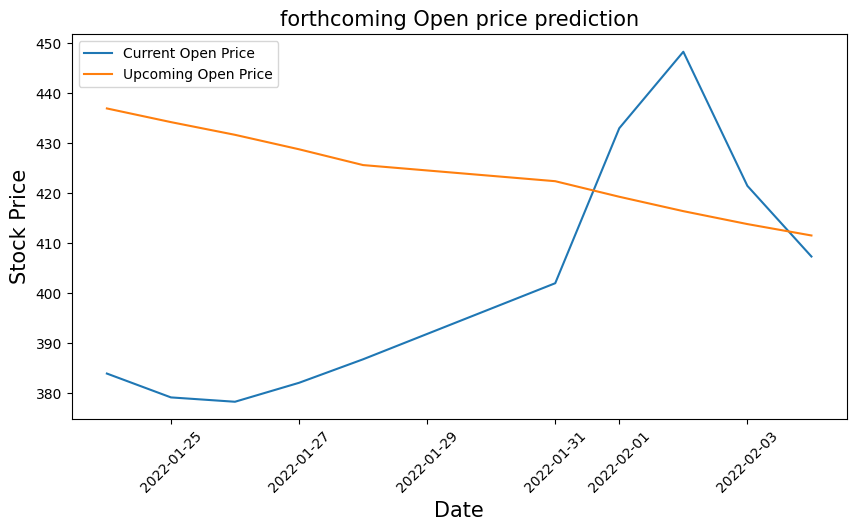

In [99]:
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

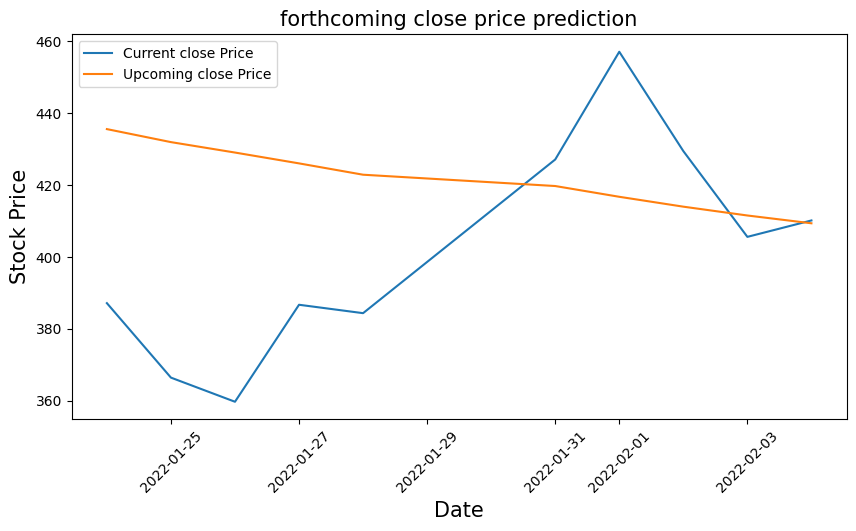

In [100]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()